# Library
Estas librerias son las que utilizaremos para el proyecto. Tanto para el grafico como para la logica.

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import random

# GenerateMap
En esta ocasion esta function tiene la logica de implementar la anchura y el largo de nodos ejm:
**width = 10**
**height = 10**
**Total de nodos existentes son 10 * 10 = 100**
Dentro de los pointsDist y pointEntre son los puntos de distribucion y entrega respectivamente. Estos se ejecutan luego de la elaboracion del mapa principal, para que luego se establesca en los nodos existente el puntos ya sea distribucion o entrega.

In [46]:
def generateMap(width, height, pointDist, pointEntre):
    
    Map = []
    distribudor = []
    entrega = []
    
    x = []
    y = []
    
    dx = []
    dy = []
    
    ex = []
    ey = []
    
    dic = {}
    
    di = pointDist
    en = pointEntre
    reduce = di + en
    
    if reduce >= width*height:
        return Map, distribudor, entrega  
    
    Bwidth = np.random.randint(40,70,width)
    Bheight = np.random.randint(40,80,height)
    
    for i in range(width):
        tem = []
        for j in range(height):
            n = random.randint(0,30)
            x.append(sum(Bwidth[:i]))
            y.append(sum(Bheight[:j]))
            tem.append([sum(Bwidth[:i]),sum(Bheight[:j]), 0])
        Map.append(tem[:])
    
    while reduce != 0:
        
        xx = random.randint(0,width-1)
        yy = random.randint(0,height-1)
        new = (str(xx)+str(yy))      
                
        if new not in dic:
            dic[new] = 1
            if en == 0 and di == 0:
                reduce = reduce -1
            elif en == 0:
                #Pertenece solamente a un distribudor
                Map[xx][yy][2] = 1
                distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                dx.append(sum(Bwidth[:xx]))
                dy.append(sum(Bheight[:yy]))
                #plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 20,  color='green')
                di = di - 1
                reduce = reduce -1
            elif di == 0:
                #Pertenece solamente a los puntos de entrega
                Map[xx][yy][2] = 2
                entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                ex.append(sum(Bwidth[:xx]))
                ey.append(sum(Bheight[:yy]))
                en = en - 1
                reduce = reduce -1
            else:
                ops = random.randint(0,1)
                if ops == 0:
                    #Pertenece solamente a un distribudor
                    Map[xx][yy][2] = 1
                    distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                    dx.append(sum(Bwidth[:xx]))
                    dy.append(sum(Bheight[:yy]))
                    di = di - 1
                    reduce = reduce -1
                elif ops == 1:
                    #Pertenece solamente a los puntos de entrega
                    Map[xx][yy][2] = 2
                    entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                    ex.append(sum(Bwidth[:xx]))
                    ey.append(sum(Bheight[:yy]))
                    en = en - 1
                    reduce = reduce -1
    
    table = [x,y,dx,dy,ex,ey]
    
    return Map, distribudor, entrega, table

# ConvertEdge
Esta funcion se encarga de convertir la matrix generada en la funcion GenerateMap a una lista de nodos, pero sin asociacion.

In [47]:
def convertEdge(M):
    
    graph = []
    distr = []
    entr = []
    
    w = len(M)
    h = len(M[0])
    node = 0
    for i in range(w):
        for j in range(h):
            y, x, t = M[i][j]
            graph.append([node,x, y, t])
            if t == 1:
                distr.append([node,x,y,t])
            if t == 2:
                entr.append([node,x,y,t])
                
            node += 1
    
    return np.array(graph), distr, entr

# Hito 1 Implementacion
Esta funcion recibe la variable M que es la matrix generada en GenerateMap que posteriormente se utilizada para la asociacion de nodos de manera no directa y se utilizara para el apoyo la funcion **ConvertEdge** para establecer los nodos asociados respectivos.

In [48]:
def graphNoDirec(M):
    
    graph = []
    edges, dist, entre = convertEdge(M)
    jump = len(M)
    
    for i in range(len(M)):        
        for j in range(len(M[0])):
            tem = []
            
            if j == 0:
                tem.append(edges[(i*jump)+j+1])
            elif j+1 == len(M):
                tem.append(edges[(i*jump)+j-1])
            else:
                tem.append(edges[(i*jump)+j+1])
                tem.append(edges[(i*jump)+j-1])
                
            if i == 0:
                tem.append(edges[(i*jump)+jump+j])
            elif i+1 == len(M):
                tem.append(edges[(i*jump)-jump+j])
            else:
                tem.append(edges[(i*jump)+jump+j])
                tem.append(edges[(i*jump)-jump+j])
            
            graph.append(tem)
    return graph, edges, dist, entre

# Hito 2 Implementacion
Para el hito 2 teniamos el trabajo que el un punto de distribucion llege a todos los nodos y esto se repetia de la misma manera a todos los puntos de distribucion.

In [49]:
def bfs(M):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    ways = []
    
    while distribucion:
        init, ix, iy, it = distribucion[0]
        pentr = len(entrega)
        dic = {}
        
        n = len(Edges)
        parent = [[None]]*n
        visited = [False]*n

        visited[init] = True
        parent[init] = [init]

        stack = []
        stack.append(init)
        while stack and pentr != 0:
            pos = stack[0]

            for i in range(len(Graph[pos])):
                node, x, y, t = Graph[pos][i]

                if visited[node] == False:
                    lp = parent[pos][:]
                    lp.append(node)
                    parent[node] = lp

                    if t == 2:
                        dic[node] = parent[node]
                        pentr = pentr - 1

                    visited[node] = True
                    stack.append(node)

            stack.pop(0)
        ways.append([init, dic])
        distribucion.pop(0)
    return ways

# Hito 3 Implementacion
Para el hito 3 tenemos el trabajo que el un punto de distribucion llege los puntos de entrega mas cercanos segun lo considere el algoritmo bfs.

In [50]:
def bfs2(M):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    ways = []
    
    nodes = [i[0] for i in distribucion]
    print(f"Puntos de distribucion: {nodes}")
    pentr = len(entrega)
    dic = {}
        
    n = len(Edges)
    parent = [[None]]*n
    visited = [False]*n
    
    stack = nodes
    for i in stack:
        visited[i] = True
        parent[i] = [i]

    while stack and pentr != 0:
        pos = stack[0]

        for i in range(len(Graph[pos])):
            node, x, y, t = Graph[pos][i]
            
            if visited[node] == False:
                lp = parent[pos][:]
                lp.append(node)
                parent[node] = lp

                if t == 2:
                    dic[node] = parent[node]
                    pentr = pentr - 1

                visited[node] = True
                stack.append(node)

        stack.pop(0)
    
    edge = Edges[5]
    point = edge[1:3]
    return dic, Edges

# Funciones para graficar (opcional)

## Graficar mapa
Los puntos negros, rojo y azul representan los puntos de distribucion, entrega y esquinas respectivamente.

In [79]:
def drawTable(table, point, size):
    
    if size == 's':
        plt.figure(figsize=(150,150))
        
    plt.plot(table[0], table[1], 's', marker=point, c='#536DFE')
    plt.plot(table[2], table[3], 's', marker=point, c='#212121')
    plt.plot(table[4], table[5], 's', marker=point, c='#FF5252')

## Graficar los caminos
Dentro de esta funcion se graficara los puntos de reparticion de un nodo al mas cercano segun el algoritmo bfs y esto para cada puntos de distribucion segun se asocia al puntos de distribucion

In [80]:
def drawRecorrido(table, recorrido, edges, point, size):
        
    rec = list(dict(recorrido).values())
    
    if size == 's':
        plt.figure(figsize=(150,150))
    
    while rec:
        
        edge = edges[rec[0]][:]
        
        for i in range(len(edge)-1):
            point1 = [edge[i][2], edge[i][1]]
            point2 = [edge[i+1][2], edge[i+1][1]]
            
            x_values = [point2[0], point1[0]]
            y_values = [point2[1], point1[1]]
            plt.plot(x_values,y_values, c='#FFEB3B')
            
        rec.pop(0)
    drawTable(table, point, 'n')

# Initializacion de los mapas
Estos mapas son constantes y se utilizara para todo el proyecto

## Initializacion del mapa con 1 millon de nodos

In [ ]:
matrix, geneDistr, geneEntre, table = generateMap(1000, 1000, 100, 2500)

## Initializacion del mapa con datos pequeños

In [ ]:
matrix1, geneDistr1, geneEntre1, table1 = generateMap(10, 10, 2, 15)

# Ejecucion para el hito 2
## Ejemplo usando nodos de 1 millon

### Para los nodos con 1 millon
En el caso de los nodos de un millon mostramos todos los caminos posibles para llegar a un punto de entrega, ya que si imprimimos cada camino se nos cuela el programa por la excesiva data.

In [132]:
recorrido = bfs(matrix)
print("ok")

ok


## Ejemplo usando datos pequeños
En esta parte usaremos como funciona nuestra funcion, ya que cuando lo hemos utilizado en datos de un millon se nos colgo el programa. El mapa fue initializado anteriormente.

### Dibujamos nuestros map(opcional)

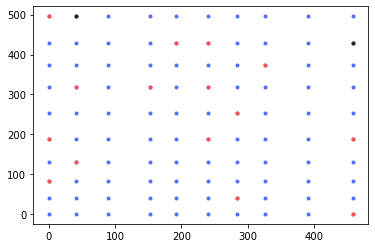

In [62]:
drawTable(table1, '.', 'n')

### Por ultimo, podremos hacer el recorrido bfs
Para este caso debemos hacer que cada punto de distribucion genere un camino a todos los puntos de entrega. Esta funciona debe ser efectuada en todos los puntos existentes de distribucion.

## Description de la data
En primer lugar, podemos observar que tenemos un arreglo doble. Esto se debe a que solo en el ejemplo inicializamos 2 puntos de distribucion y 8 puntos de entrega. Del primer output tenemos, [18, {15: [18,17,16,15]} ...]. Esto significa que el nodo 18 es un punto de distribucion. Dentro del dictionario se encuentra 15 que es un punto de distribucion y dentro de este diccionario hay un arreglo. Esto significa los nodos que recorre para llegar al nodo 15. 

En este caso pasa de 18 distribucion a 17 esquina a 16 esquina y 15 punto de entrega.

In [43]:
recorrido = bfs(matrix1)
print(np.array(recorrido))

[[25
  {36: [25, 26, 36], 14: [25, 24, 14], 5: [25, 15, 5], 37: [25, 26, 27, 37], 38: [25, 26, 27, 28, 38], 32: [25, 24, 23, 22, 32], 12: [25, 24, 23, 22, 12], 43: [25, 24, 23, 33, 43], 57: [25, 26, 27, 37, 47, 57], 31: [25, 24, 23, 22, 21, 31], 62: [25, 24, 23, 22, 32, 42, 52, 62], 78: [25, 26, 27, 28, 38, 48, 58, 68, 78], 88: [25, 26, 27, 28, 38, 48, 58, 68, 78, 88], 70: [25, 24, 23, 22, 21, 20, 30, 40, 50, 60, 70], 92: [25, 24, 23, 22, 32, 42, 52, 62, 72, 82, 92]}]
 [65
  {57: [65, 66, 67, 57], 62: [65, 64, 63, 62], 78: [65, 66, 67, 68, 78], 36: [65, 66, 56, 46, 36], 43: [65, 64, 63, 53, 43], 88: [65, 66, 67, 68, 78, 88], 37: [65, 66, 67, 57, 47, 37], 38: [65, 66, 67, 68, 58, 48, 38], 70: [65, 64, 63, 62, 61, 60, 70], 92: [65, 64, 63, 62, 72, 82, 92], 32: [65, 64, 63, 62, 52, 42, 32], 14: [65, 64, 54, 44, 34, 24, 14], 5: [65, 55, 45, 35, 25, 15, 5], 31: [65, 64, 63, 62, 61, 51, 41, 31], 12: [65, 64, 63, 62, 52, 42, 32, 22, 12]}]]


# Ejecucion Hito 3

## Ejecucion con datos de 1 millon

In [58]:
record , edgeess = bfs2(matrix)

Puntos de distribucion: [17230, 23543, 24516, 24957, 42258, 57551, 60384, 72067, 81125, 102436, 111265, 111803, 138278, 149331, 152233, 169873, 173011, 191380, 193801, 204161, 209622, 226117, 238530, 267535, 272074, 284707, 319930, 353085, 364801, 373061, 383651, 386284, 389371, 397439, 413212, 417782, 420178, 438133, 439039, 455641, 471319, 473736, 478677, 490739, 502901, 505209, 524905, 525790, 544682, 549954, 553968, 557304, 561460, 563917, 583692, 588880, 590882, 609754, 611615, 621258, 623990, 624264, 624623, 626239, 632742, 648839, 653455, 654575, 655807, 662992, 678255, 679783, 680638, 696476, 714167, 719335, 724860, 728063, 728101, 728120, 788271, 794595, 799084, 803951, 829791, 850040, 874835, 888157, 893012, 901724, 904527, 932860, 945899, 946335, 957984, 958787, 972411, 981376, 991912, 992546]


### Graficamos los caminos(opcional)

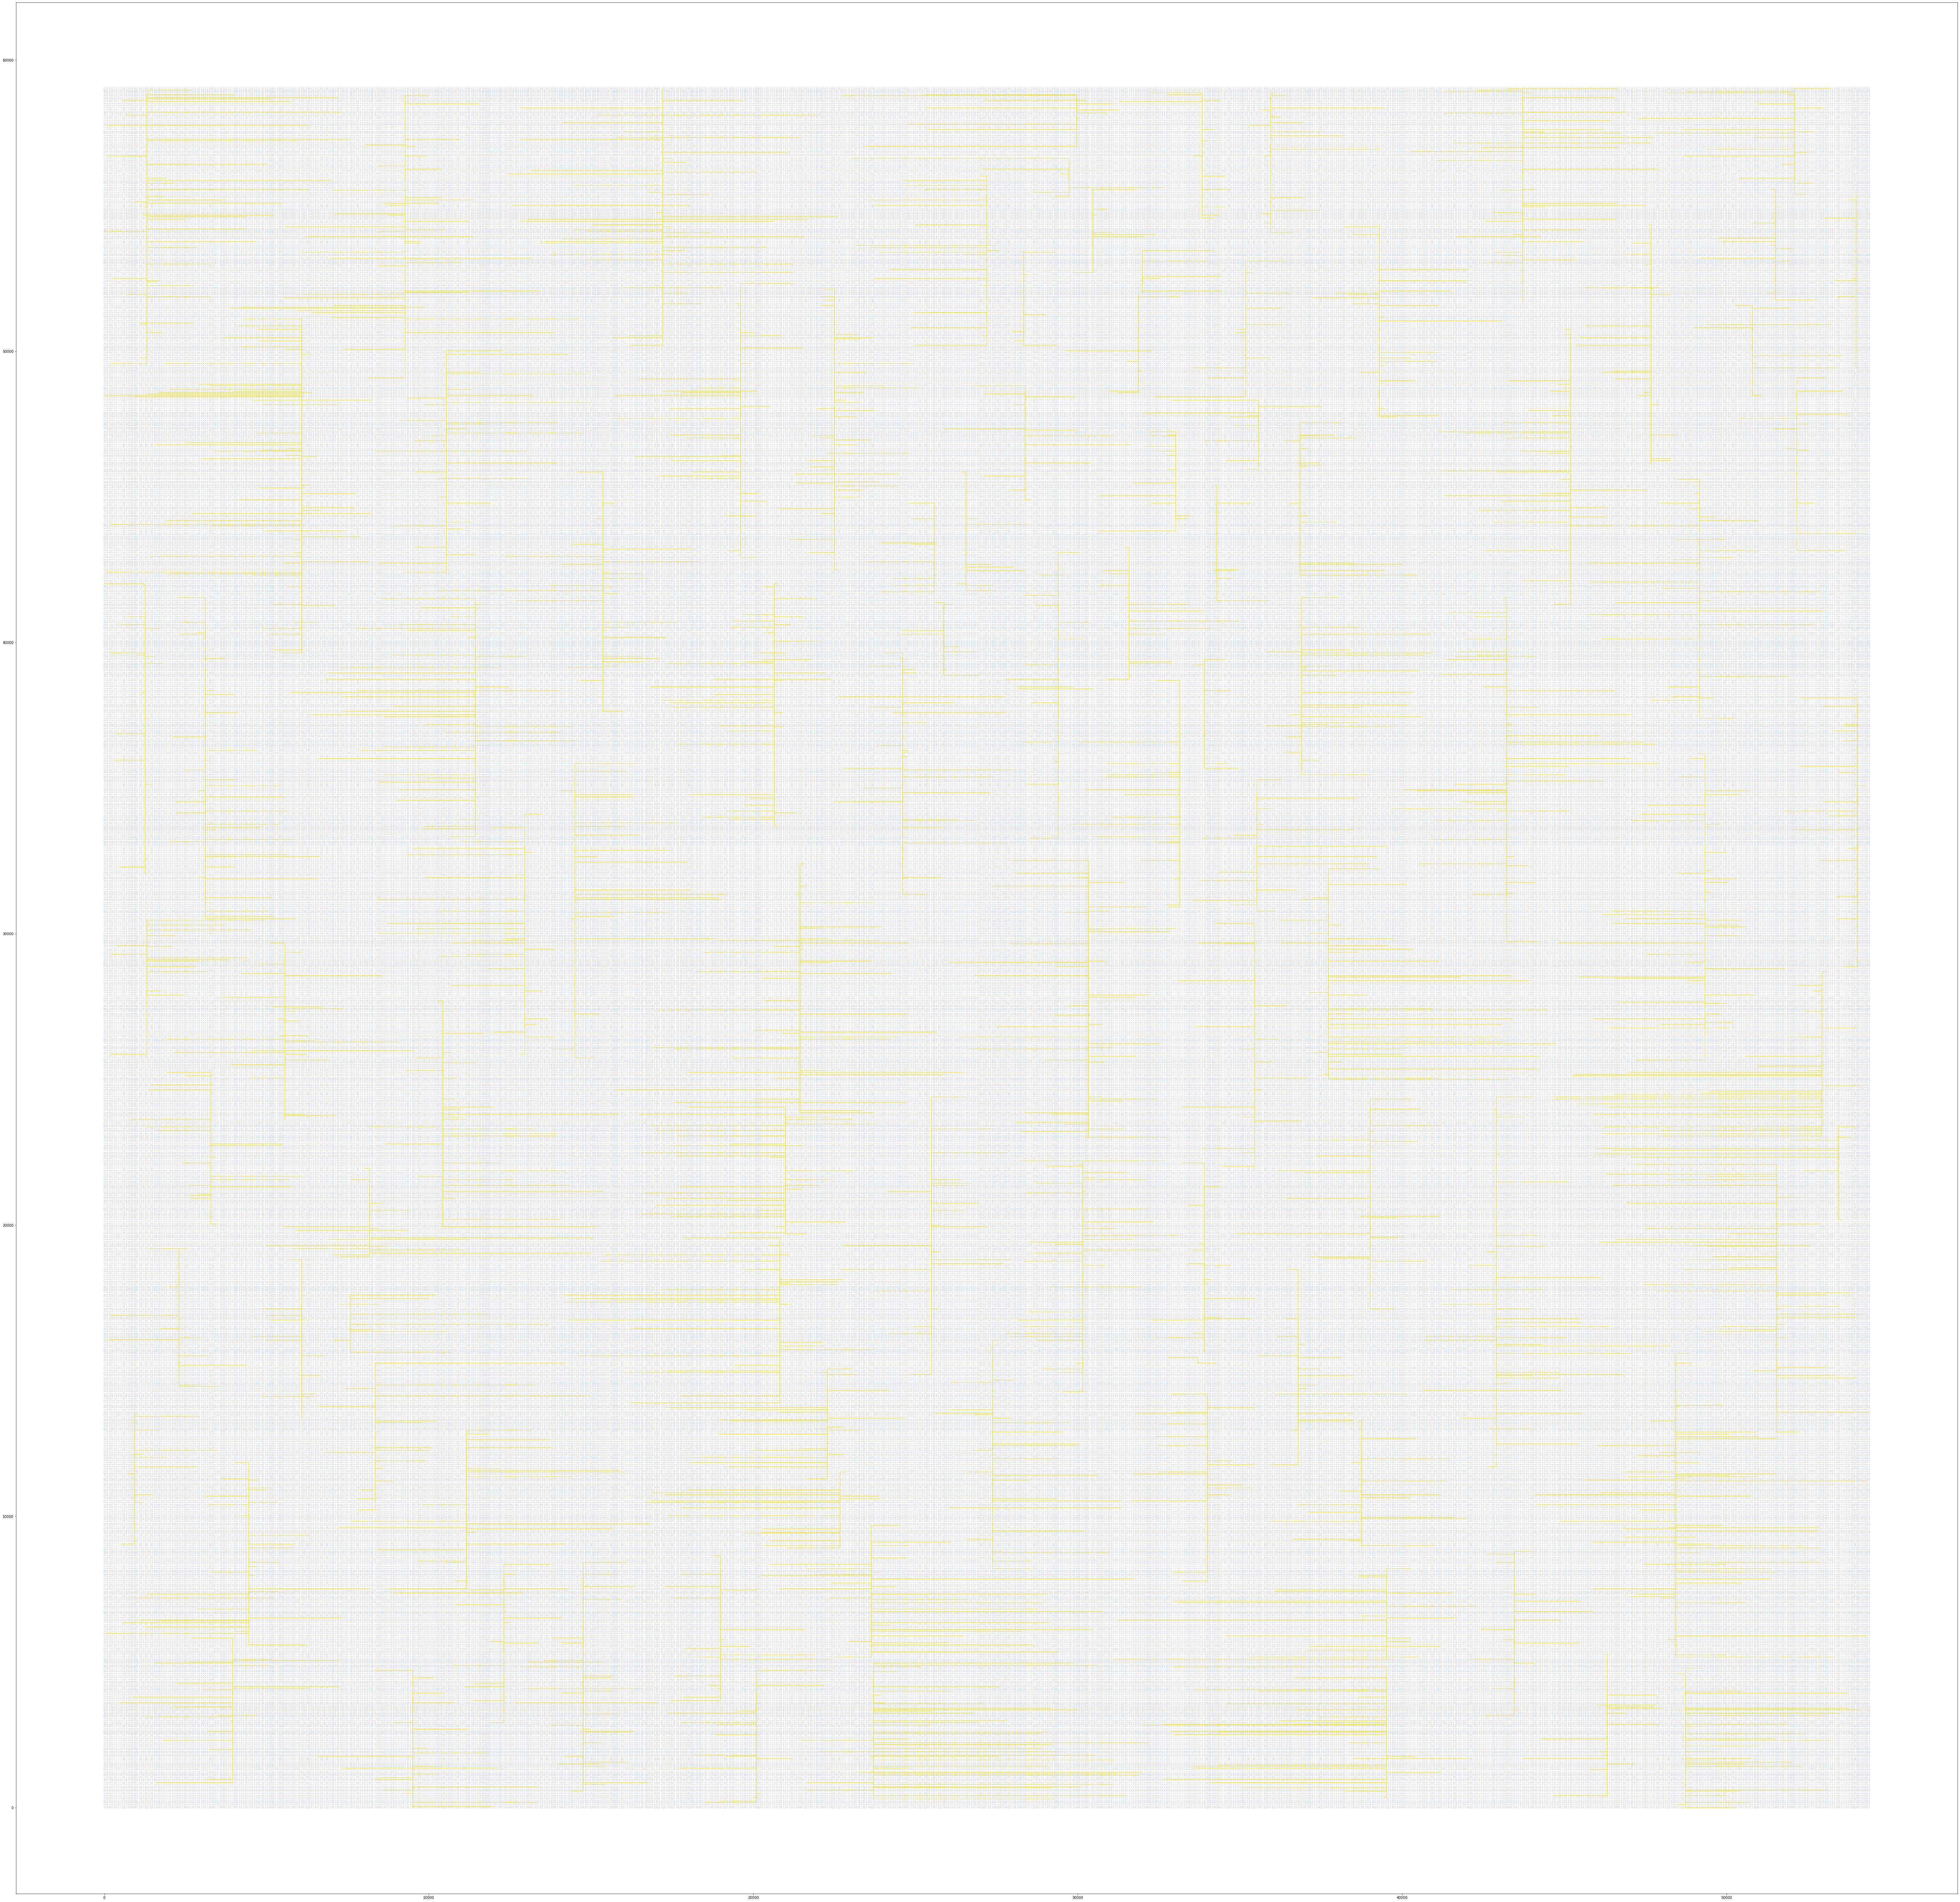

In [83]:
drawRecorrido(table, record, edgeess, ',','s')

## Ejecucion con datos pequeños

### Utilizamos la funcion bfs2
Nos devolvera la lista que recorre apartir de los puntos de distribucion

In [63]:
recorrido, edges = bfs2(matrix1)
print(recorrido)

Puntos de distribucion: [19, 98]
{9: [19, 9], 16: [19, 18, 17, 16], 77: [98, 97, 87, 77], 48: [19, 18, 28, 38, 48], 94: [98, 97, 96, 95, 94], 58: [98, 88, 78, 68, 58], 36: [19, 18, 17, 16, 26, 36], 13: [19, 18, 17, 16, 15, 14, 13], 4: [19, 18, 17, 16, 15, 14, 4], 65: [98, 97, 96, 95, 85, 75, 65], 56: [98, 97, 96, 86, 76, 66, 56], 2: [19, 18, 17, 16, 15, 14, 13, 12, 2], 90: [98, 97, 96, 95, 94, 93, 92, 91, 90], 54: [98, 97, 96, 95, 94, 84, 74, 64, 54], 61: [98, 97, 96, 95, 94, 93, 92, 91, 81, 71, 61]}


### Graficamos los caminos(opcional)

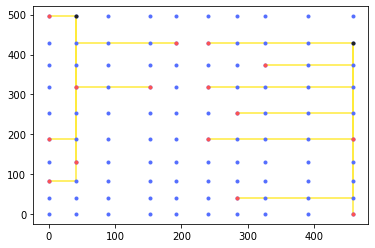

In [68]:
drawRecorrido(table1, recorrido, edges, '.', 'n')